In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)


def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return


def plot_ts_and_points(data, start_point, step):
    ts = pd.Series(data)
    new_series = [None for i in range(len(data))]
    for i in range(len(data)):
        pos = start_point + step * i
        if pos >= len(data):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)

    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

In [3]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [4]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

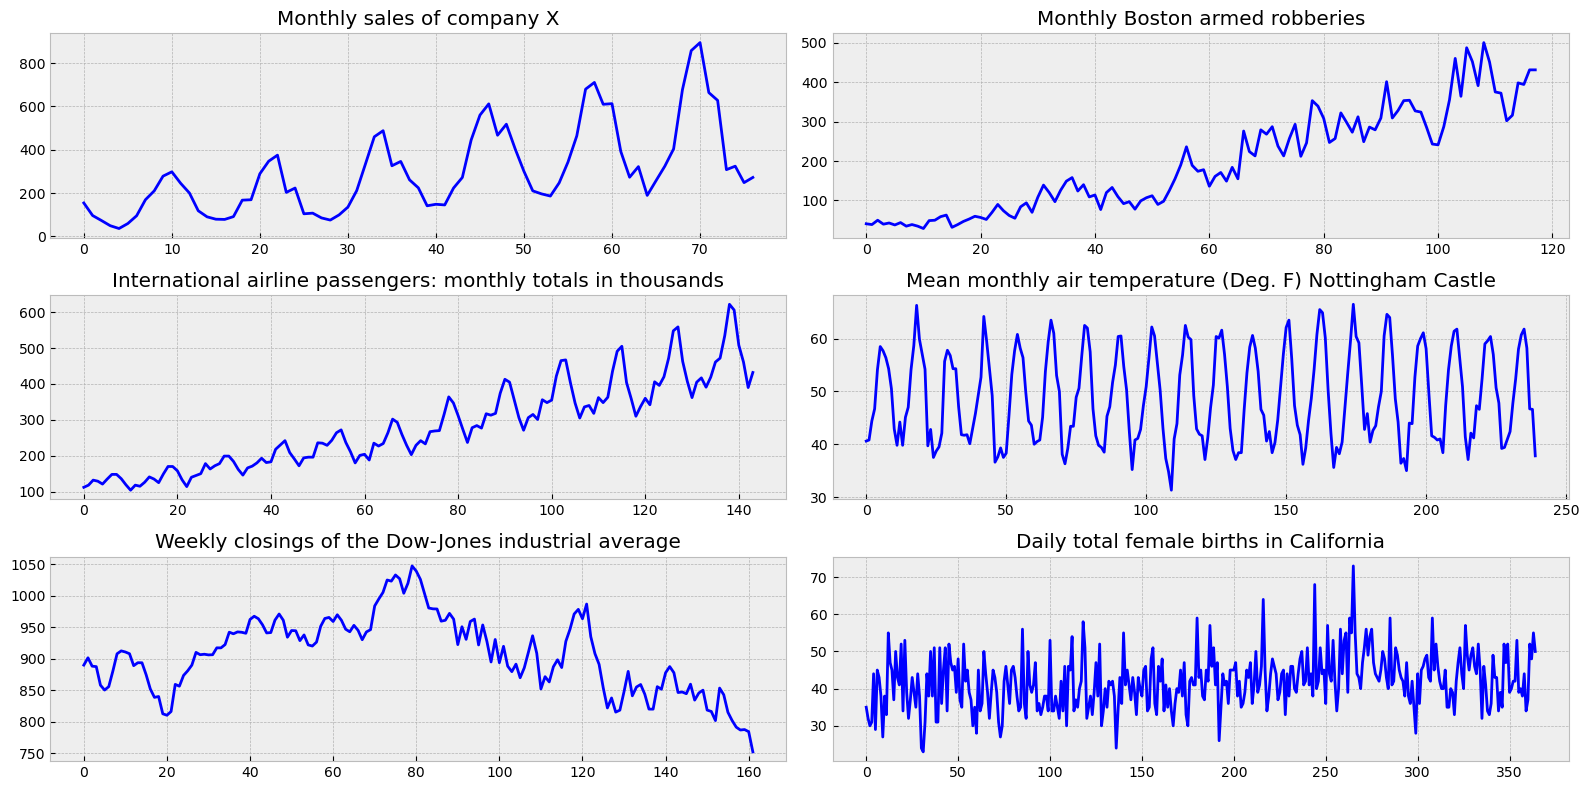

In [5]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

### Датасет Monthly sales of company X

In [6]:
series = all_series['Monthly sales of company X']

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


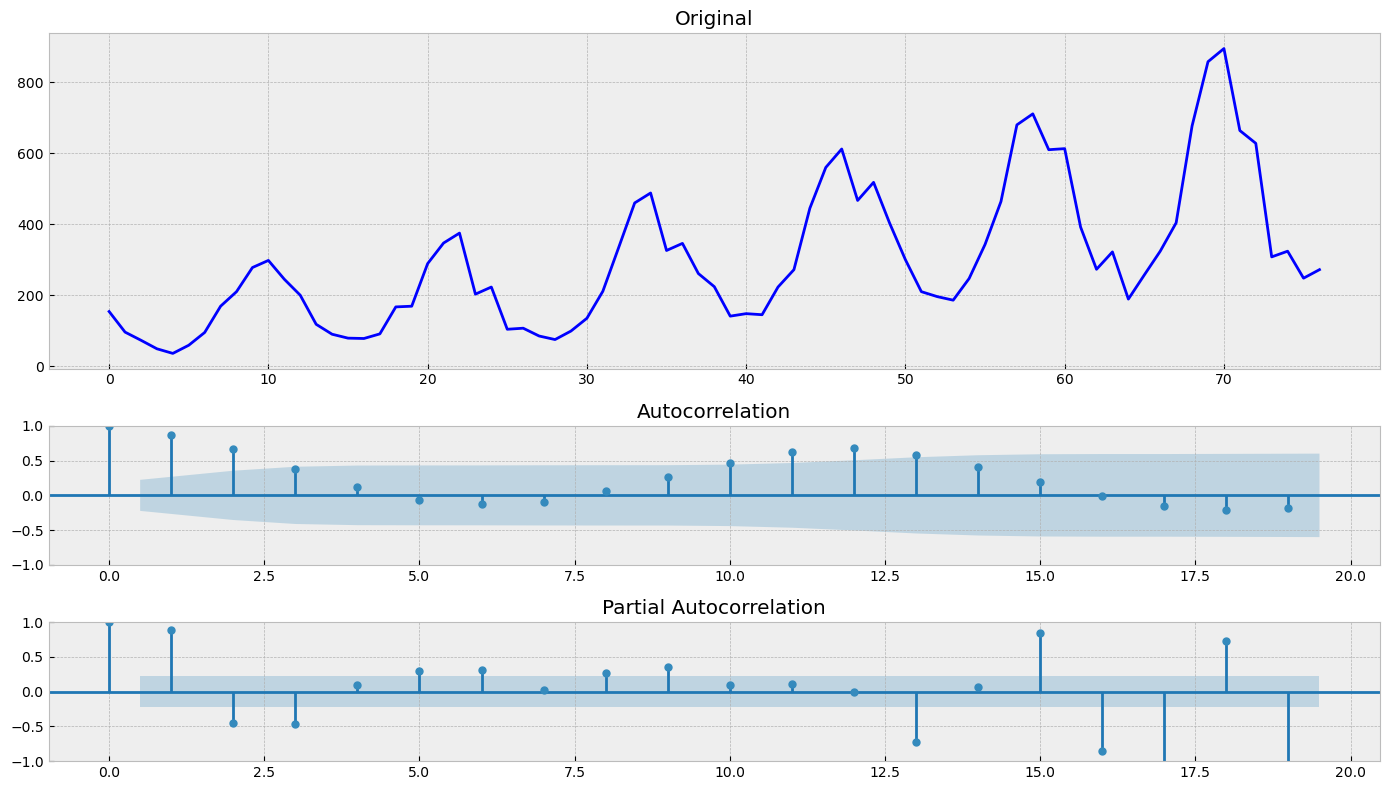

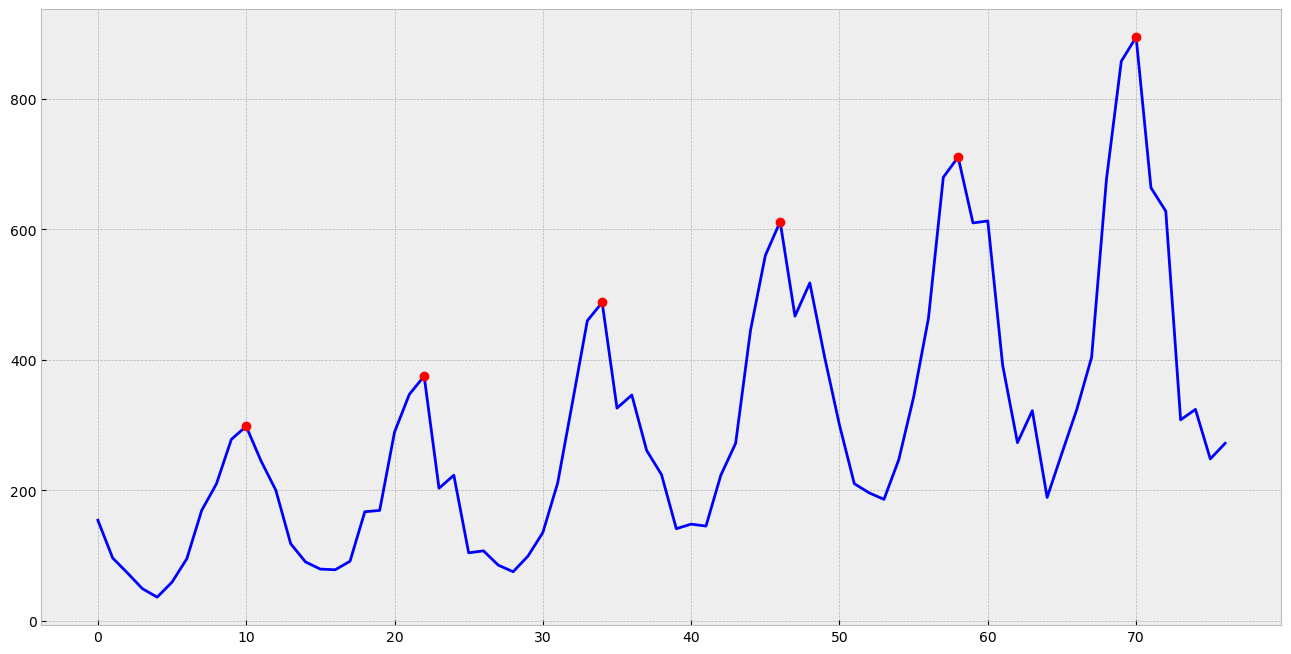

In [7]:
tsplot(series)
plot_ts_and_points(series, 10, 12)

Визуальный анализ показал:
- изменение дисперсии во времени
- присутствие тренда
- присутствие сезонности

Также тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда

Преобразования:
- уберем изменение дисперсии при помощи преобразования Бокса-Кокса
- уберем тренд продифференцировав ряд с лагом 1
- уберем сезонность продифференцировав ряд с лагом 12

Results of Dickey-Fuller Test:
Test Statistic                 -2.316045
p-value                         0.166845
#Lags Used                     10.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


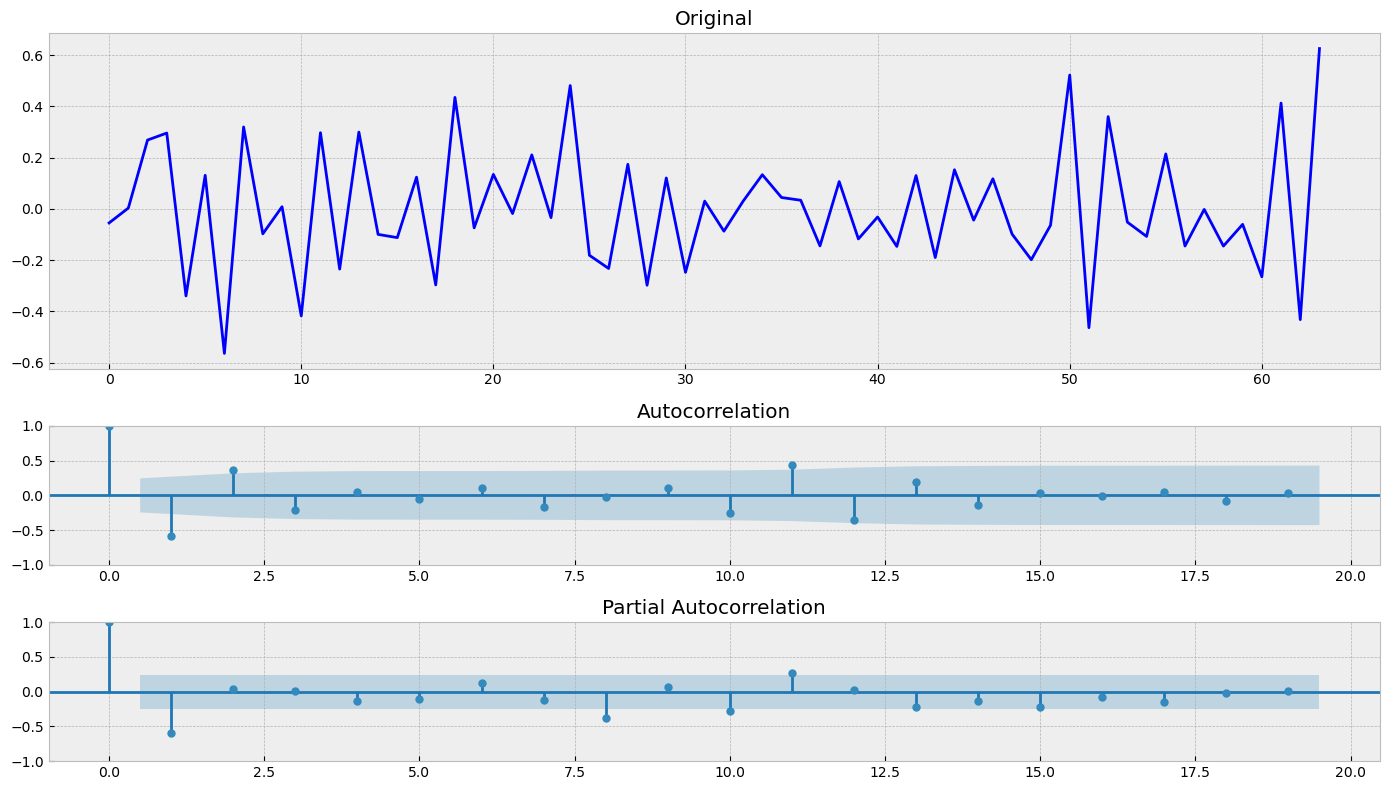

In [8]:
series1 = boxcox(series, 0)
series1 = series1[1:] - series1[:-1]
series1 = series1[12:] - series1[:-12]
tsplot(series1)

Тест Дикки-Фуллера по прежнему не отвергает гипотезу о нестационарности ряда.
Возможно присутствует цикл. Попробую убрать его продифференцировав с лагом 30

Results of Dickey-Fuller Test:
Test Statistic                 -1.122309
p-value                         0.706094
#Lags Used                     10.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


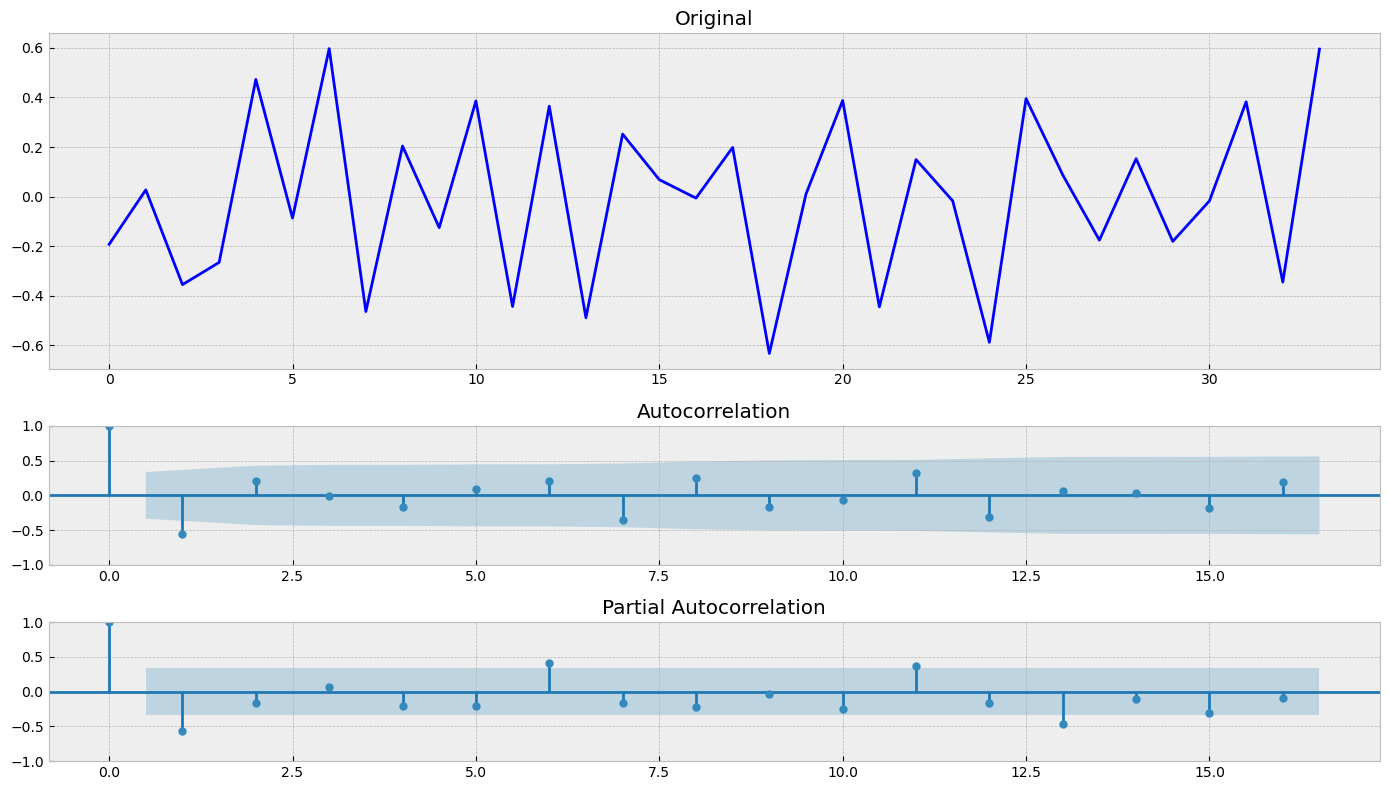

In [9]:
tsplot(series1[30:] - series1[:-30])

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!


### Датасет Monthly Boston armed robberies


In [10]:
series = all_series['Monthly Boston armed robberies']

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


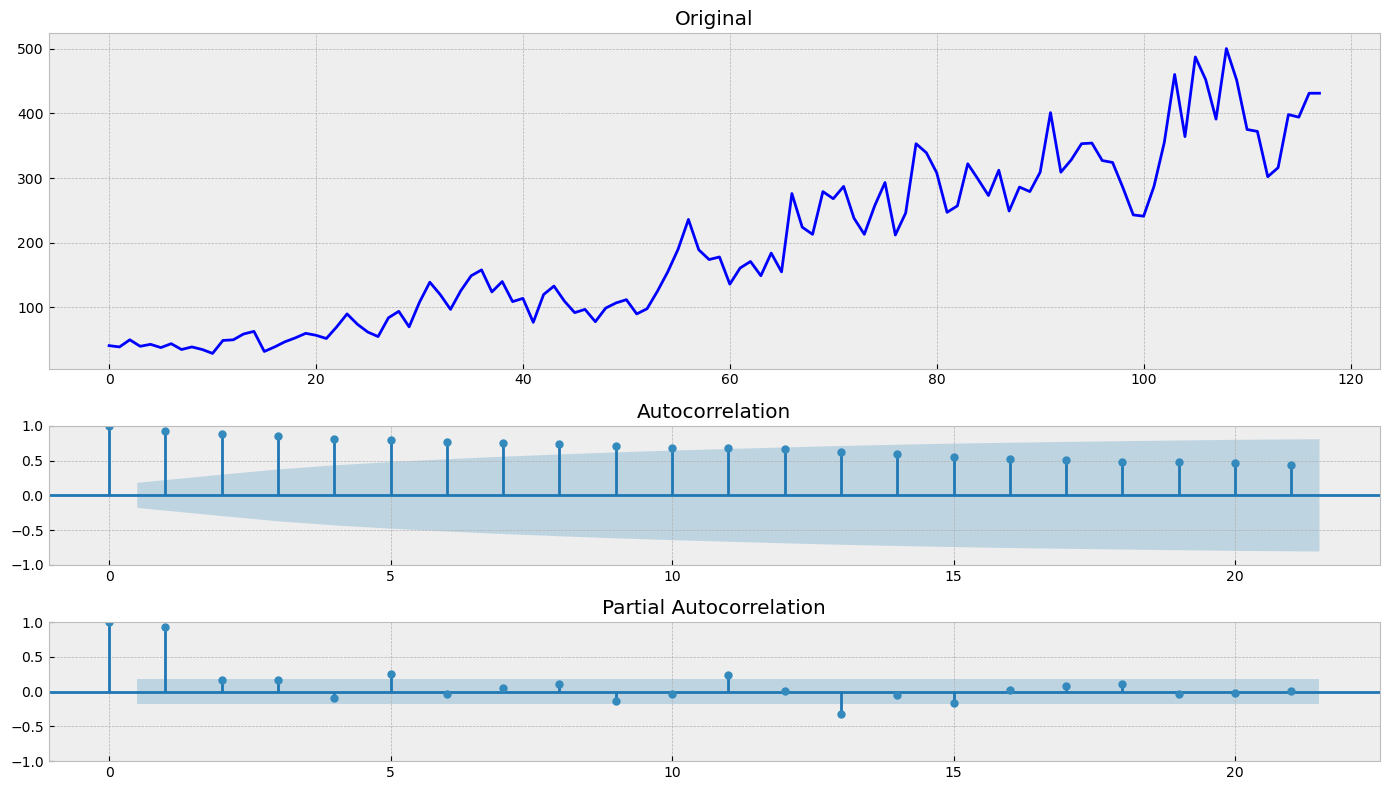

In [11]:
tsplot(series)

Визуальный анализ показал:
- изменение дисперсии во времени
- сильное влияние тренда

Также тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда

Преобразования:
- уберем изменение дисперсии при помощи преобразования Бокса-Кокса
- уберем тренд продифференцировав ряд с лагом 1

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


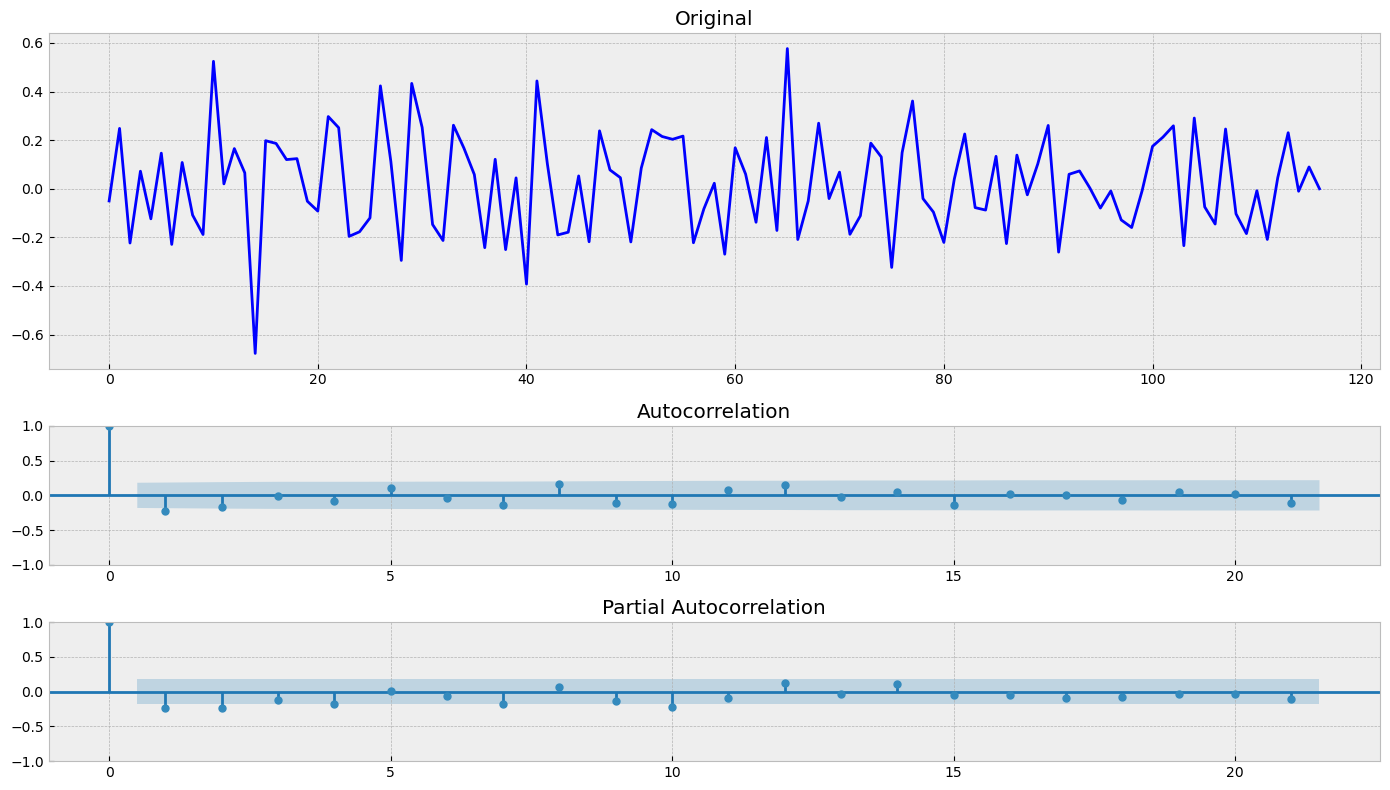

In [12]:
series1 = boxcox(series, 0)
series1 = series1[1:] - series1[:-1]
tsplot(series1)

### Датасет International airline passengers: monthly totals in thousands


In [13]:
series = all_series['International airline passengers: monthly totals in thousands']

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


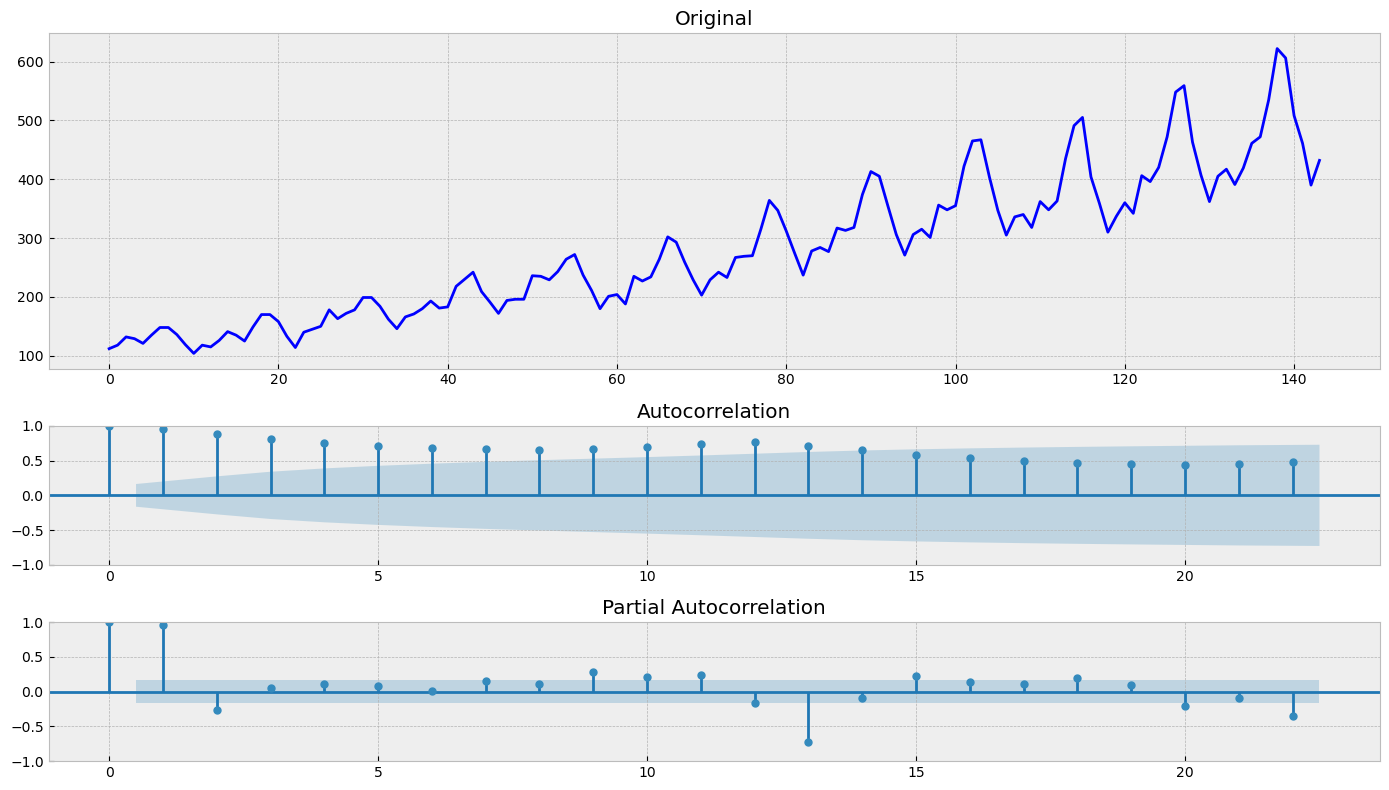

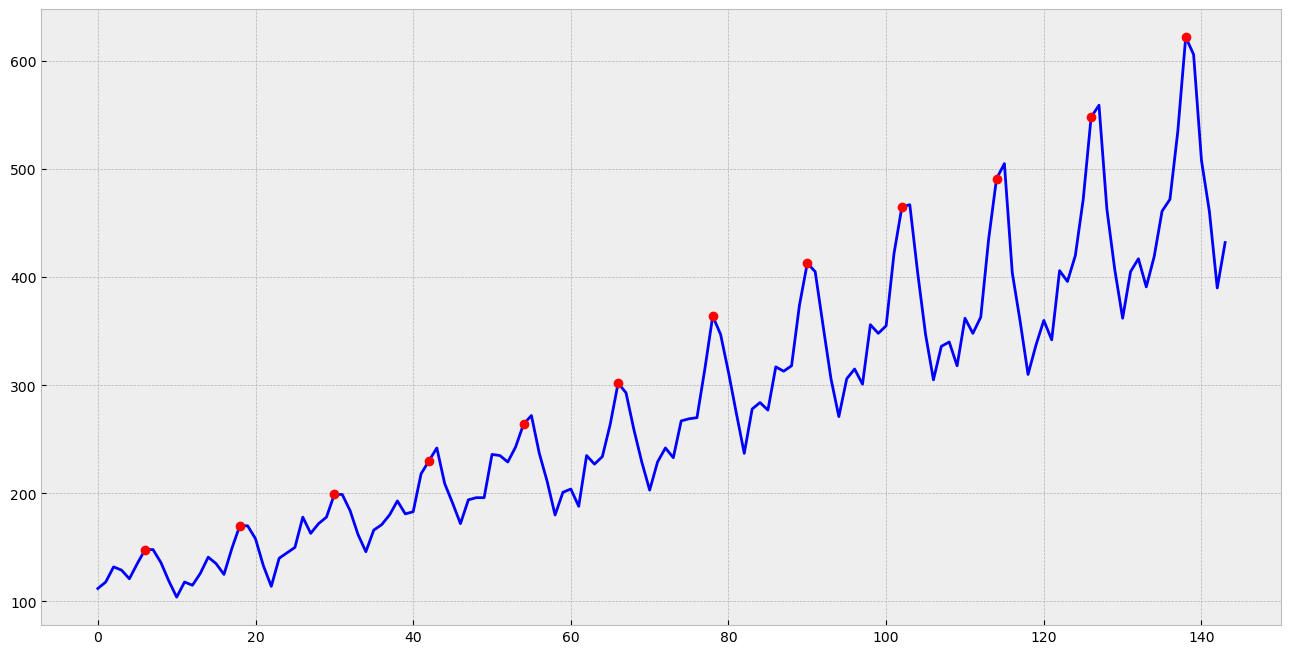

In [14]:
tsplot(series)
plot_ts_and_points(series, 6, 12)

Визуальный анализ показал:
- изменение дисперсии во времени
- сильное влияние тренда
- явное влияние сезонности

Тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда

Преобразования:
- уберем изменение дисперсии при помощи преобразования Бокса-Кокса
- уберем тренд продифференцировав ряд с лагом 1
- уберем сезонность продифференцировав ряд с лагом 12

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


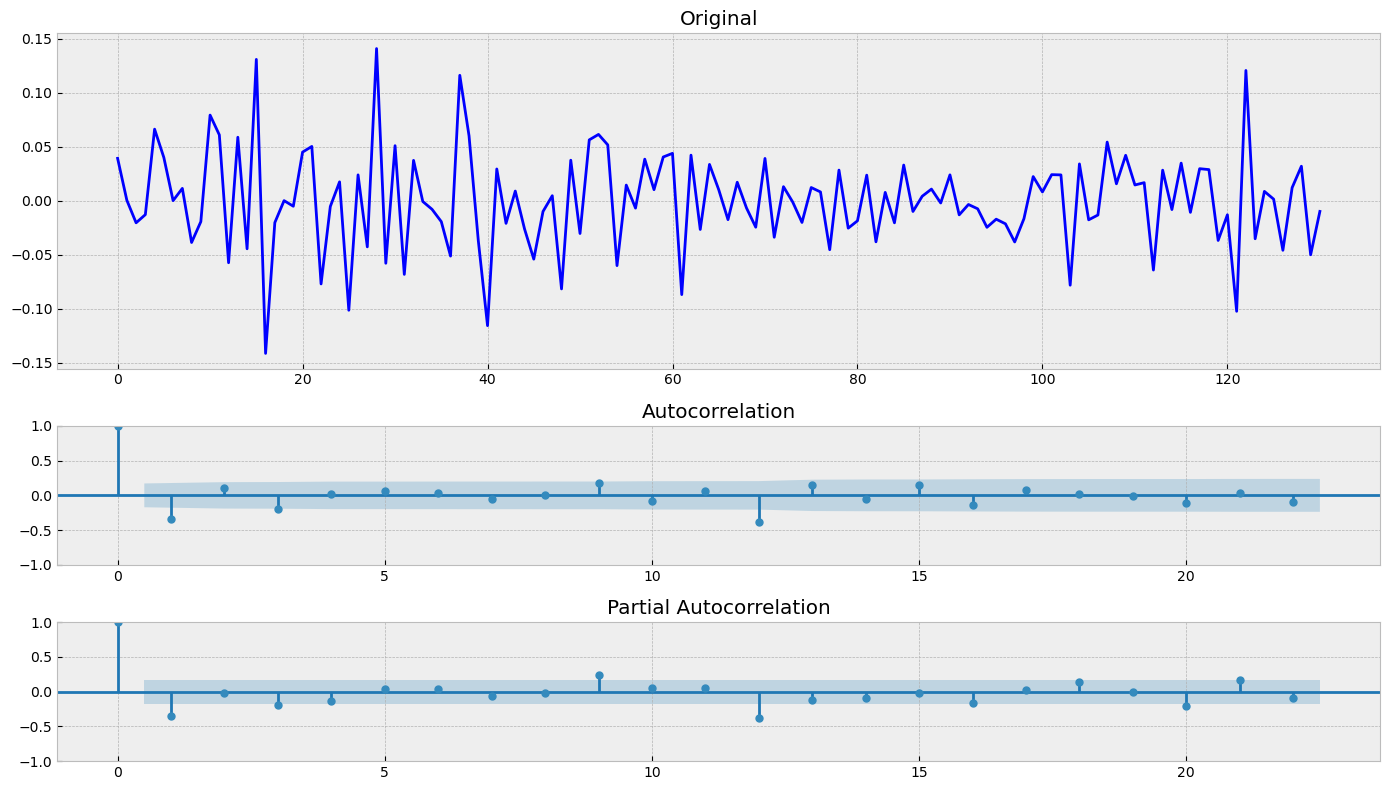

In [15]:
series1 = boxcox(series, 0)
series1 = series1[1:] - series1[:-1]
series1 = series1[12:] - series1[:-12]
tsplot(series1)

Судя по тесту Дики-Фуллера и графику коррелограмм можно отвергнуть нулевую гипотезу о нестационарности ряда

### Датасет Mean monthly air temperature (Deg. F) Nottingham Castle

In [16]:
series = all_series['Mean monthly air temperature (Deg. F) Nottingham Castle'].to_numpy()

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


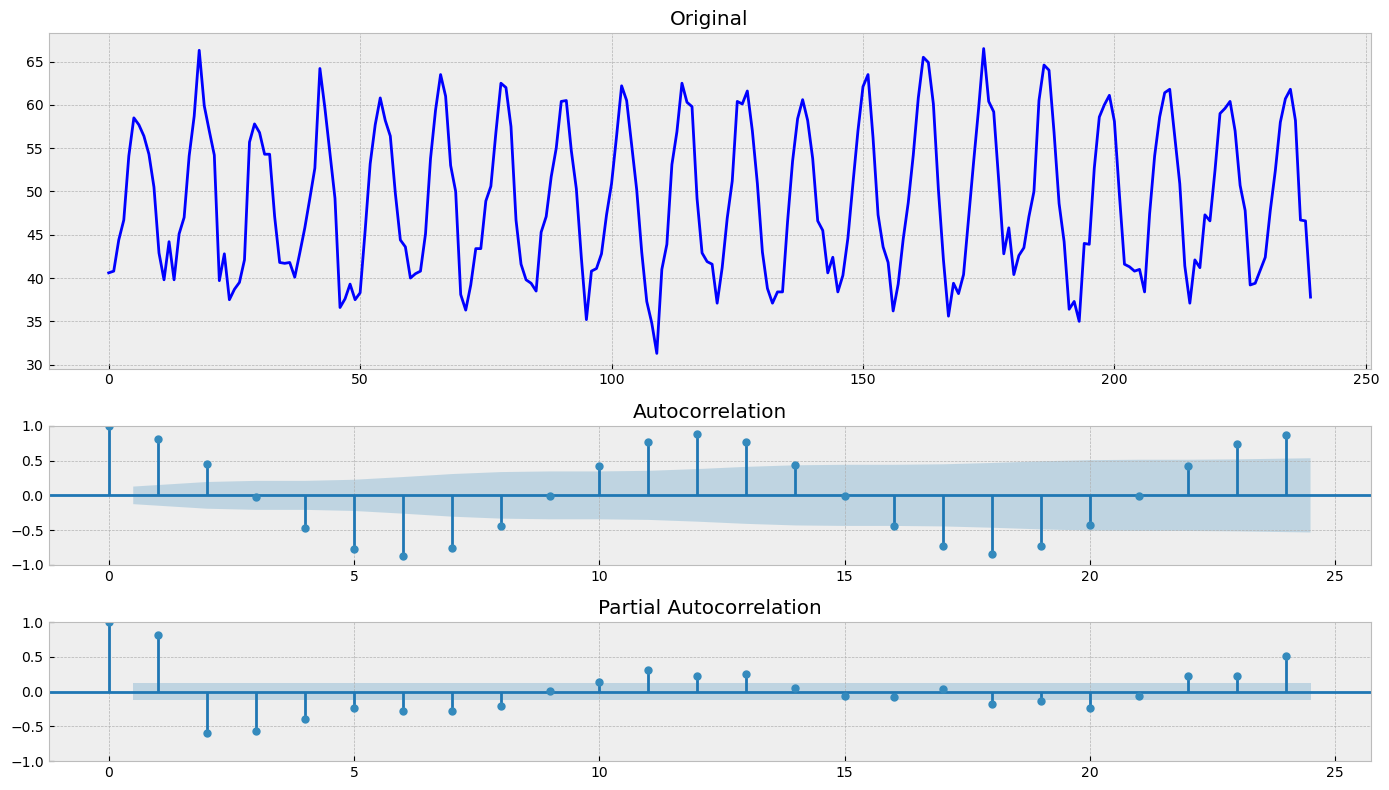

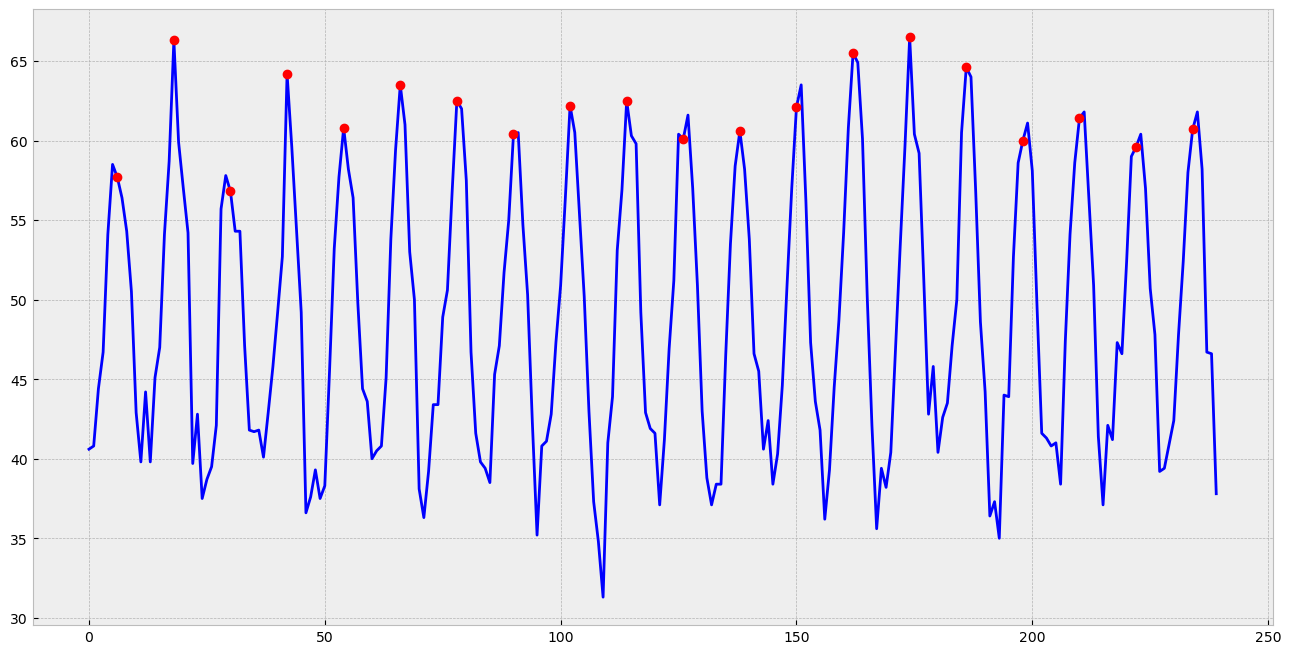

In [17]:
tsplot(series)
plot_ts_and_points(series, 6, 12)

Визуальный анализ показал только влияние сезонности

Тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда

Уберем сезонность продифференцировав ряд с лагом 12

Results of Dickey-Fuller Test:
Test Statistic                -6.072501e+00
p-value                        1.141945e-07
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


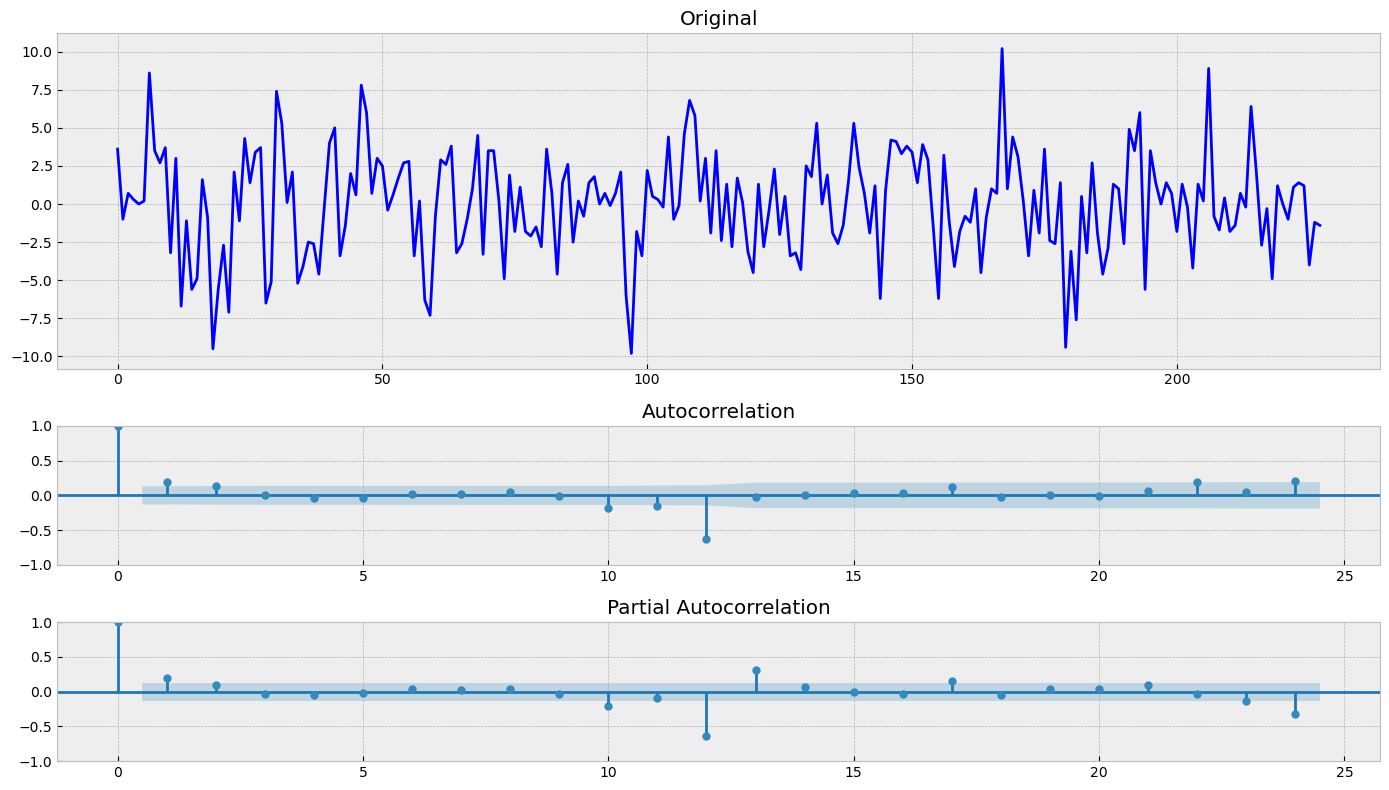

In [18]:
series1 = series[12:] - series[:-12]
tsplot(series1)

Тесту Дики-Фуллера отвергает гипотезу о нестационарности ряда


### Датасет Weekly closings of the Dow-Jones industrial average

In [19]:
series = all_series['Weekly closings of the Dow-Jones industrial average'].to_numpy()

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


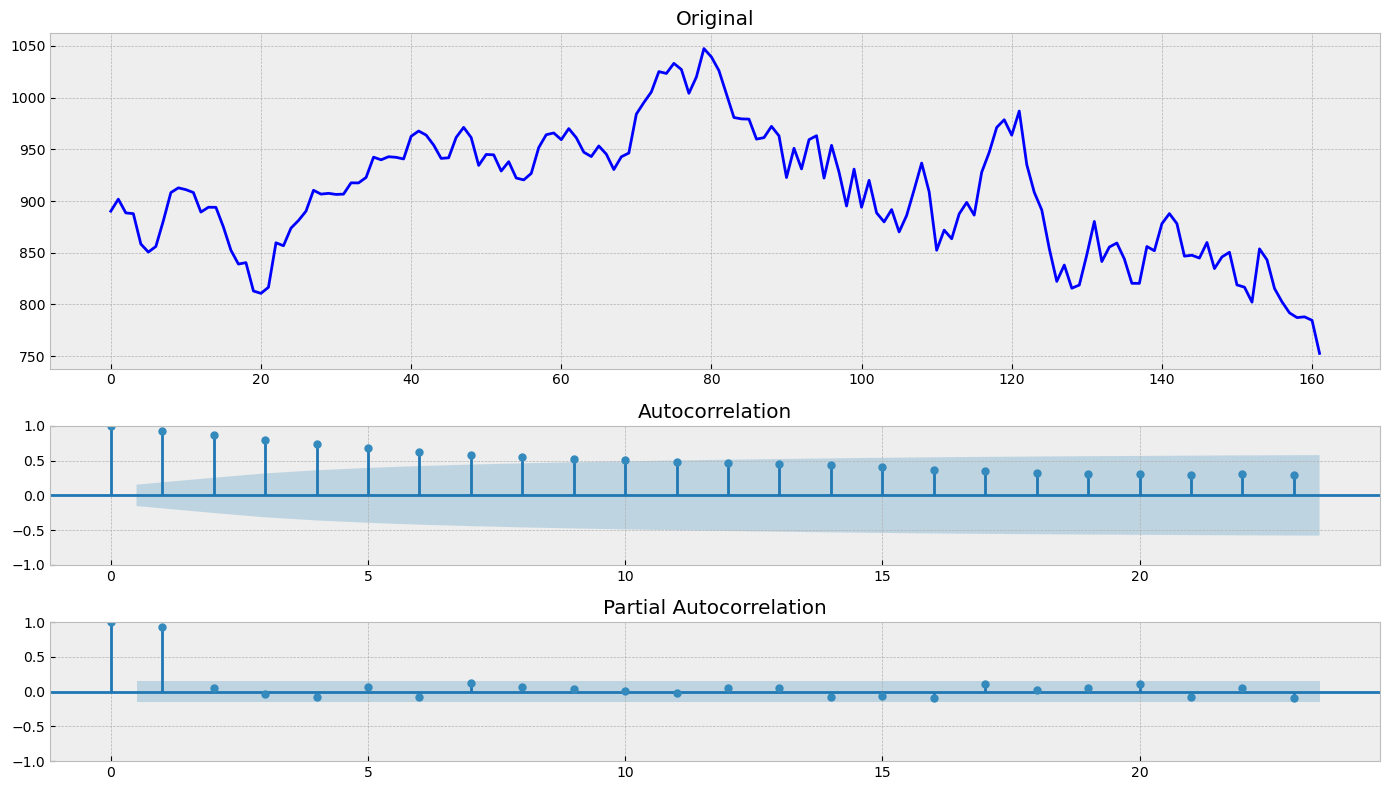

In [20]:
tsplot(series)

Визуальный анализ показал наличие восходящего и нисходящего тренда

Тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда

Избавимся от тренда продифференцировав ряд с лагом 1

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


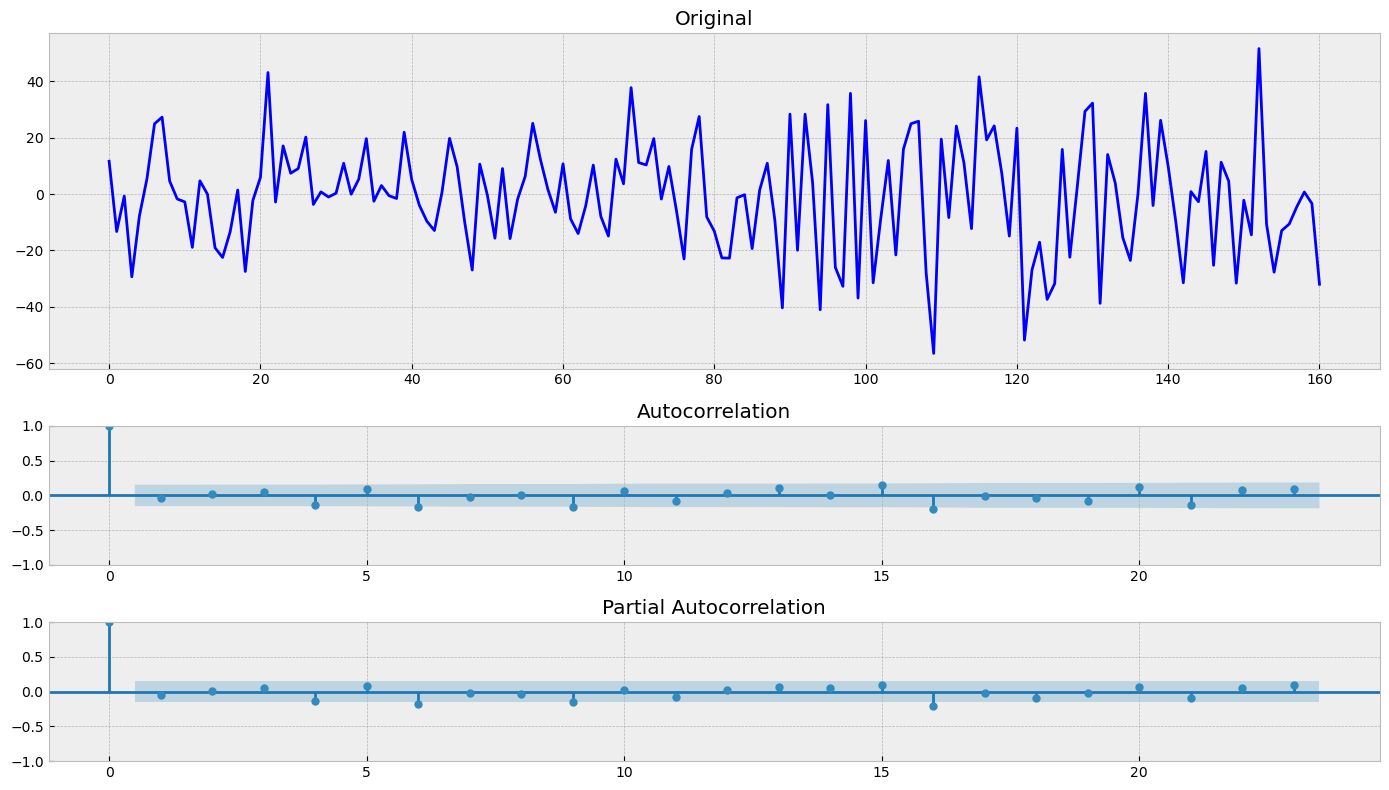

In [21]:
series1 = series[1:] - series[:-1]
tsplot(series1)

Тесту Дики-Фуллера отвергает гипотезу о нестационарности ряда

### Датасет Daily total female births in California

In [22]:
series = all_series['Daily total female births in California'].to_numpy()

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


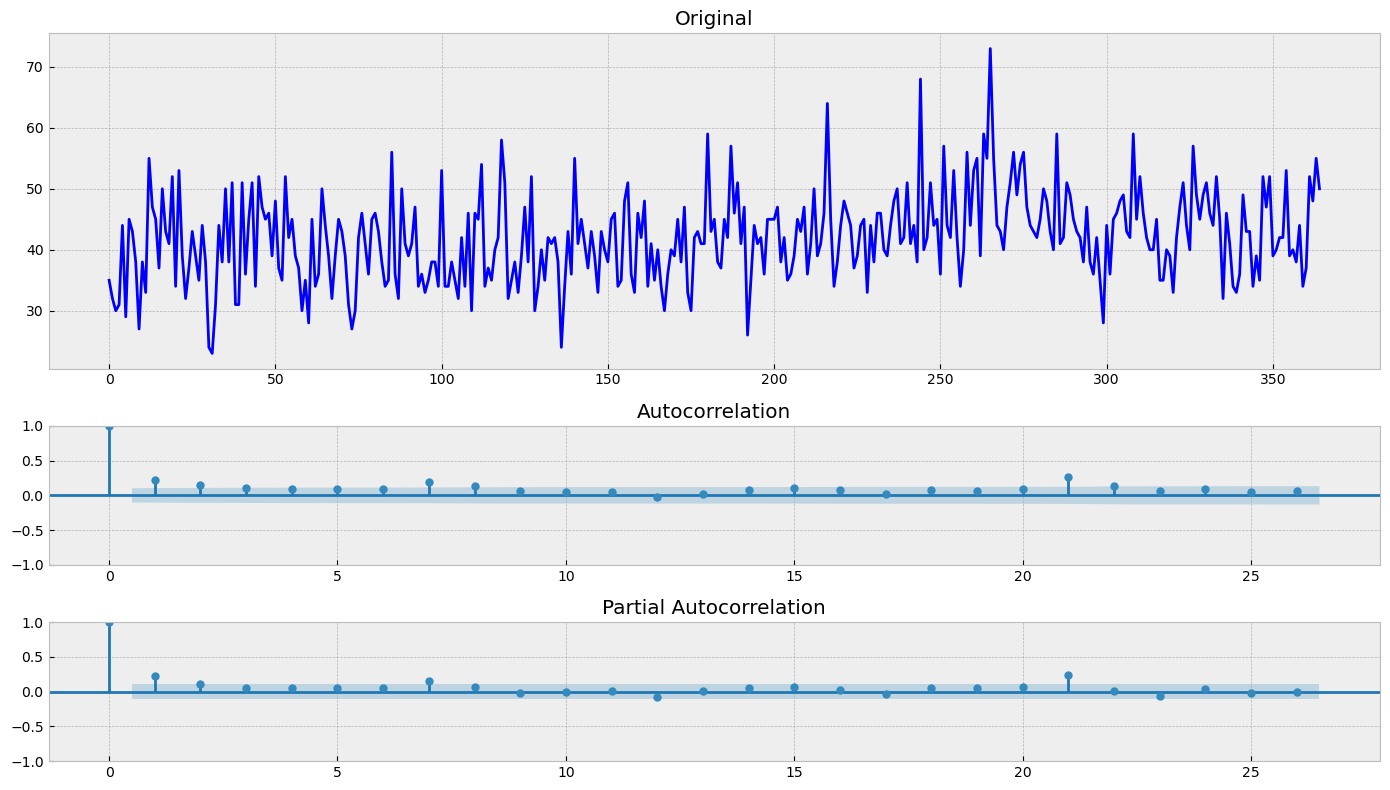

In [23]:
tsplot(series)

Тесту Дики-Фуллера уже отвергает гипотезу о нестационарности ряда
